Convolutional Neural Network - VGG16

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
import numpy as np
from collections import defaultdict
import os
import shutil
import seaborn as sns
import random
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping


Loading the data from the dataset


Training the model

Found 8704 files belonging to 4 classes.
Found 1536 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.
Epoch 1/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 692s 3s/step - accuracy: 0.4870 - loss: 1.1871 - val_accuracy: 0.7096 - val_loss: 0.6865
Epoch 2/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 696s 3s/step - accuracy: 0.7264 - loss: 0.6961 - val_accuracy: 0.7923 - val_loss: 0.5473
Epoch 3/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 717s 3s/step - accuracy: 0.7545 - loss: 0.5950 - val_accuracy: 0.8223 - val_loss: 0.4800
Epoch 4/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 735s 3s/step - accuracy: 0.7882 - loss: 0.5169 - val_accuracy: 0.8359 - val_loss: 0.4466
Epoch 5/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 749s 3s/step - accuracy: 0.8026 - loss: 0.4842 - val_accuracy: 0.8203 - val_loss: 0.4265
Epoch 6/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 766s 3s/step - accuracy: 0.8118 - loss: 0.4526 - val_accuracy: 0.8398 - val_loss: 0.4092
Epoch 7/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 750s 3s/step - accuracy: 0.8173 - loss: 0.4371 - val_accuracy: 

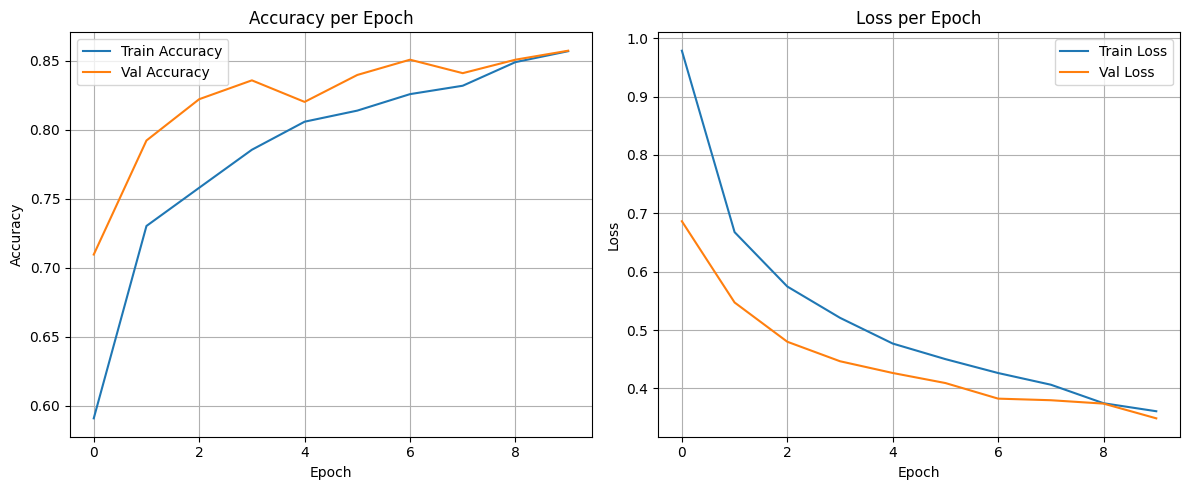

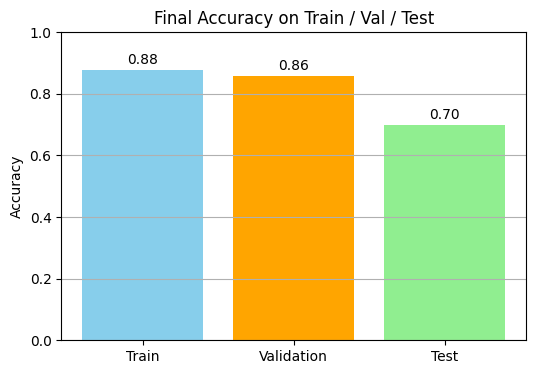

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

<Figure size 600x600 with 0 Axes>

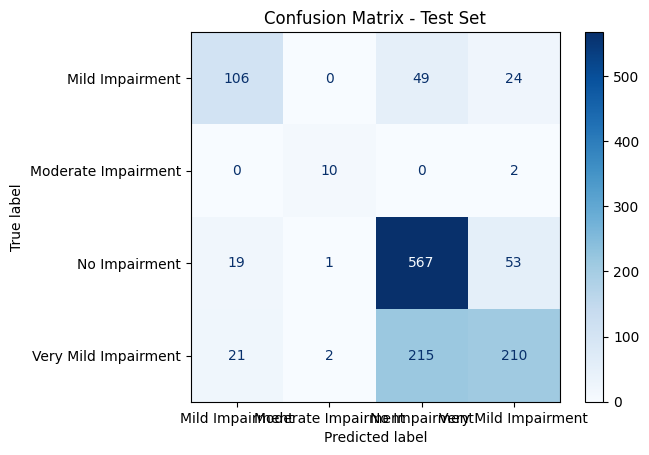

In [5]:
train_dir = './data/train'
val_dir = './data/val'
test_dir = './data/test'

img_size = (128, 128)
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical')
val_ds = tf.keras.utils.image_dataset_from_directory(val_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical')
test_ds_raw = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical')

class_names = test_ds_raw.class_names

normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds_raw.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=AUTOTUNE)

base_model = VGG16(include_top=False, weights='imagenet', input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=10)

model.save("modelo_fase1.keras")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

train_loss, train_acc = model.evaluate(train_ds, verbose=0)
val_loss, val_acc = model.evaluate(val_ds, verbose=0)
test_loss, test_acc = model.evaluate(test_ds, verbose=0)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Train', 'Validation', 'Test'], [train_acc, val_acc, test_acc], color=['skyblue', 'orange', 'lightgreen'])
plt.title('Final Accuracy on Train / Val / Test')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')
plt.grid(axis='y')
plt.show()

y_pred = []
y_true = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_pred.extend(tf.argmax(preds, axis=1).numpy())
    y_true.extend(tf.argmax(labels, axis=1).numpy())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Test Set')
plt.show()

Fine Tuning ( last 4 layers)

Found 8704 files belonging to 4 classes.
Found 1536 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.
0: input_layer (InputLayer)
1: block1_conv1 (Conv2D)
2: block1_conv2 (Conv2D)
3: block1_pool (MaxPooling2D)
4: block2_conv1 (Conv2D)
5: block2_conv2 (Conv2D)
6: block2_pool (MaxPooling2D)
7: block3_conv1 (Conv2D)
8: block3_conv2 (Conv2D)
9: block3_conv3 (Conv2D)
10: block3_pool (MaxPooling2D)
11: block4_conv1 (Conv2D)
12: block4_conv2 (Conv2D)
13: block4_conv3 (Conv2D)
14: block4_pool (MaxPooling2D)
15: block5_conv1 (Conv2D)
16: block5_conv2 (Conv2D)
17: block5_conv3 (Conv2D)
18: block5_pool (MaxPooling2D)
19: flatten (Flatten)
20: dense (Dense)
21: dropout (Dropout)
22: dense_1 (Dense)
Epoch 1/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 1109s 4s/step - accuracy: 0.8644 - loss: 0.3352 - val_accuracy: 0.9030 - val_loss: 0.2516
Epoch 2/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 1065s 4s/step - accuracy: 0.9018 - loss: 0.2370 - val_accuracy: 0.9199 - val_loss: 0.2061
Epoch 3/5
272/272 ━━━━━━━

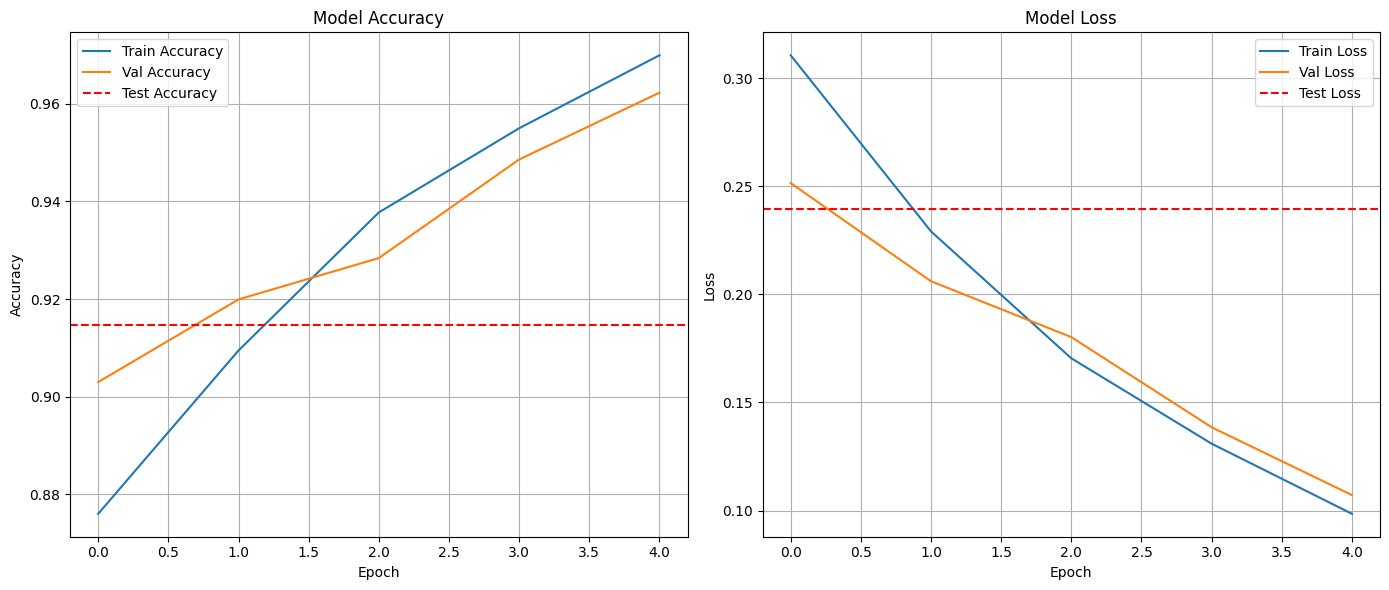

40/40 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step


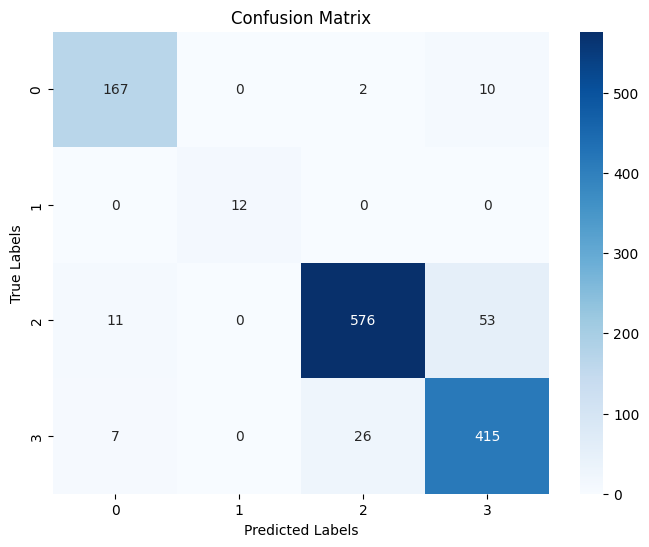

In [10]:
train_dir = './data/train'
val_dir = './data/val'
test_dir = './data/test'

img_size = (128, 128)
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical')
val_ds = tf.keras.utils.image_dataset_from_directory(val_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical')
test_ds_raw = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical')

class_names = test_ds_raw.class_names

normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds_raw.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=AUTOTUNE)

model = load_model("modelo_fase1.keras")

for i, layer in enumerate(model.layers):
    print(f"{i}: {layer.name} ({type(layer).__name__})")

for layer in model.layers[15:19]:  
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_finetune = model.fit(train_ds, validation_data=val_ds, epochs=5)

test_loss, test_accuracy = model.evaluate(test_ds)

model.save("modelo_fase2.keras")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='Val Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_finetune.history['loss'], label='Train Loss')
plt.plot(history_finetune.history['val_loss'], label='Val Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.concatenate([np.argmax(label.numpy(), axis=1) for _, label in test_ds], axis=0)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Found 8704 files belonging to 4 classes.
Found 1536 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.
0: input_layer (InputLayer)
1: block1_conv1 (Conv2D)
2: block1_conv2 (Conv2D)
3: block1_pool (MaxPooling2D)
4: block2_conv1 (Conv2D)
5: block2_conv2 (Conv2D)
6: block2_pool (MaxPooling2D)
7: block3_conv1 (Conv2D)
8: block3_conv2 (Conv2D)
9: block3_conv3 (Conv2D)
10: block3_pool (MaxPooling2D)
11: block4_conv1 (Conv2D)
12: block4_conv2 (Conv2D)
13: block4_conv3 (Conv2D)
14: block4_pool (MaxPooling2D)
15: block5_conv1 (Conv2D)
16: block5_conv2 (Conv2D)
17: block5_conv3 (Conv2D)
18: block5_pool (MaxPooling2D)
19: flatten (Flatten)
20: dense (Dense)
21: dropout (Dropout)
22: dense_1 (Dense)
Epoch 1/12
272/272 ━━━━━━━━━━━━━━━━━━━━ 2944s 11s/step - accuracy: 0.9873 - loss: 0.0605 - val_accuracy: 0.9681 - val_loss: 0.0907
Epoch 2/12
272/272 ━━━━━━━━━━━━━━━━━━━━ 3197s 12s/step - accuracy: 0.9921 - loss: 0.0449 - val_accuracy: 0.9720 - val_loss: 0.0846
Epoch 3/12
272/272 ━━

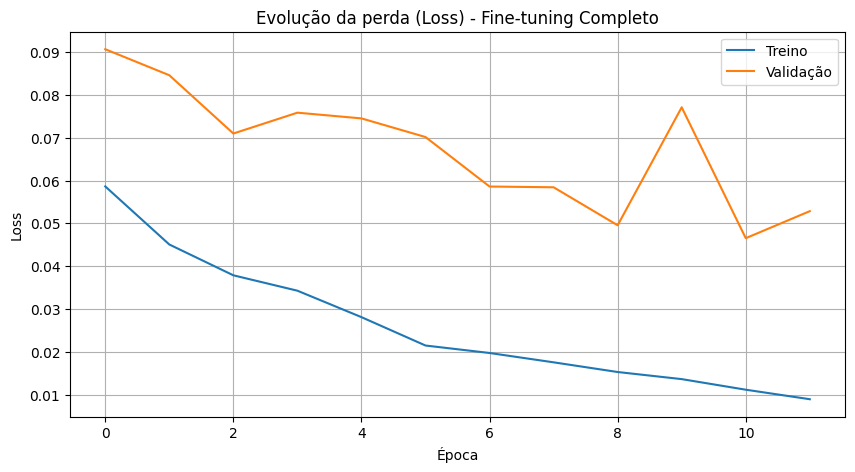

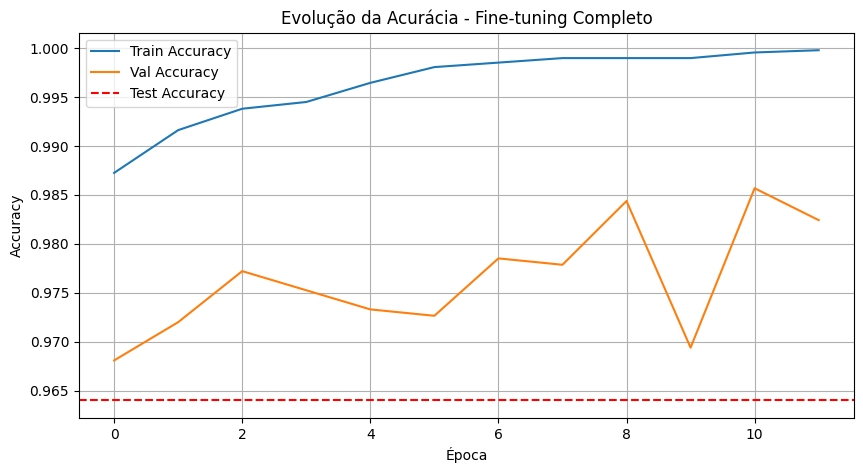

40/40 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step


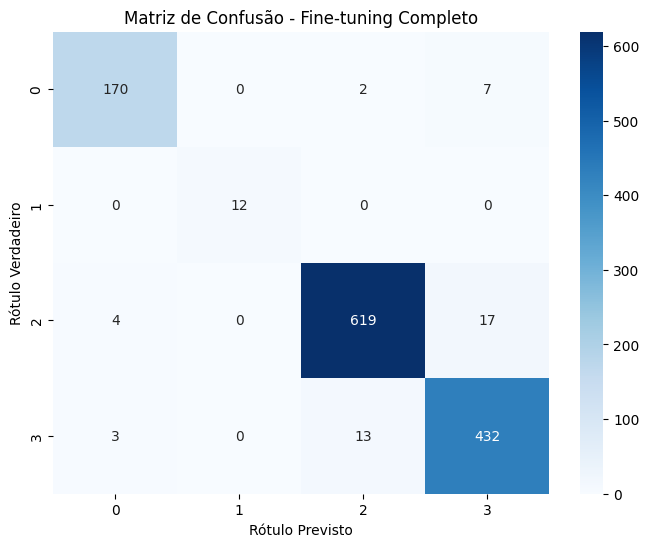

In [13]:
train_dir = './data/train'
val_dir = './data/val'
test_dir = './data/test'

img_size = (128, 128)
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical')
val_ds = tf.keras.utils.image_dataset_from_directory(val_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical')
test_ds_raw = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=img_size, batch_size=batch_size, label_mode='categorical')

class_names = test_ds_raw.class_names

normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds_raw.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=AUTOTUNE)

model = load_model("modelo_fase2.keras")

for i, layer in enumerate(model.layers):
    print(f"{i}: {layer.name} ({type(layer).__name__})")

for layer in model.layers:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history_full_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=12,
    callbacks=[early_stop]
)

test_loss, test_accuracy = model.evaluate(test_ds)

model.save("modelo_fase4.keras")

plt.figure(figsize=(10, 5))
plt.plot(history_full_finetune.history['loss'], label='Treino')
plt.plot(history_full_finetune.history['val_loss'], label='Validação')
plt.title('Evolução da perda (Loss) - Fine-tuning Completo')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_full_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history_full_finetune.history['val_accuracy'], label='Val Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Evolução da Acurácia - Fine-tuning Completo')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.concatenate([np.argmax(label.numpy(), axis=1) for _, label in test_ds], axis=0)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Fine-tuning Completo')
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.show()


In [14]:
train_acc = history_full_finetune.history['accuracy'][-1]
val_acc = history_full_finetune.history['val_accuracy'][-1]

print(f"Acurácia final (treino): {train_acc:.4f}")
print(f"Acurácia final (validação): {val_acc:.4f}")
print(f"Acurácia final (teste): {test_accuracy:.4f}")
print(f"Perda final (teste): {test_loss:.4f}")


Acurácia final (treino): 0.9998
Acurácia final (validação): 0.9824
Acurácia final (teste): 0.9640
Perda final (teste): 0.1038
